In [1]:
import pickle
import signalprocessing as sigp
import seaborn as sn
import soundmfccparams as smfccp

In [2]:
# Path for packs
signalPath = r"/home/vaclav/Desktop/Diploma/Dirty Signals/Test/Test08/"

# Path for RandomForestClassifier
classifierPath = "/home/vaclav/Desktop/Diploma/Notebooks/Classifier/classificator.sav"

In [3]:
# Extracting the dataframes (data characteristics)
signalDataFrame = sigp.extract_data(signalPath)

/home/vaclav/Desktop/Diploma/Notebooks/Classifier/signalprocessing.py:339: RuntimeWarning: divide by zero encountered in log
  return (np.exp((1 / length) * np.sum(np.log(magnitudes)))) / ((1 / length) * np.sum(magnitudes))


In [5]:
#signalDataFrame = smfccp.pca_dataframe(signalDataFrame, 15)
#rng = range(0, int((len(list(signalDataFrame))-1)/2)+1)
#new_cols = ['type_' + str(i) for i in rng] + ['expt_' + str(i) for i in rng]
#signalDataFrame.columns = new_cols[:len(list(signalDataFrame))]
signalDataFrame

,Total MaxAmp,Split MaxAmp 1,Split MaxAmp 2,Split MaxAmp 3,Split MaxAmp 4,SCO,Crest Factor,Centroid,Spread,Flatness,...,MFCC_10,MFCC_11,MFCC_12,MFCC_13,MFCC_14,MFCC_15,MFCC_16,MFCC_17,MFCC_18,MFCC_19
0,64366.973369,6554.307671,53421.149260,33231.309360,8251.536121,963.743078,140.320600,2155.897126,3.367115e+06,0.005139,...,-5.075145,0.862997,3.396182,1.983882,9.839686,-1.712572,12.215659,-3.025622,7.995335,-3.381610
1,59467.130144,41670.408077,23412.482986,30237.786243,15950.344753,980.893252,105.600419,2122.326743,3.704692e+06,0.005428,...,-9.616542,2.376969,5.265054,2.377791,8.570126,0.557869,8.865927,-1.310985,7.302817,-4.134362
2,82443.459268,3782.168709,55409.043962,60384.951181,4109.927526,1115.863972,151.519525,2306.786317,3.548394e+06,0.004673,...,-5.599358,-0.575402,8.139382,0.741525,10.008496,0.559207,7.997122,-1.690337,7.204412,-4.075125
3,197807.180874,99738.560825,106425.406060,97216.727245,91235.035936,2032.735378,200.017855,3078.568239,5.049017e+06,0.003353,...,-19.242275,11.322592,-3.675401,7.702262,8.524419,-1.597369,12.778297,-4.015484,9.625084,-7.945086
4,85598.354241,5465.690965,65187.959027,54723.692865,5484.814745,1087.905513,153.400785,2481.546650,4.038061e+06,0.004800,...,-7.538534,4.579116,2.118959,-0.595611,11.167545,-3.720840,13.252705,-3.170726,7.769764,-2.212989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848,78778.172225,6955.516031,61037.282476,47789.539131,7982.032162,1121.459776,116.824831,2236.716461,3.490969e+06,0.004717,...,-7.902307,-0.170866,6.381275,-0.175530,10.272422,1.280212,8.628250,-1.220338,8.416211,-4.560558
1849,67907.706671,7248.841126,28710.954508,60433.992705,7859.626749,1095.939628,121.290299,2007.493399,3.498364e+06,0.004990,...,-5.224432,-0.323104,6.929564,0.708722,8.920970,0.864714,8.687879,-1.161428,6.346879,-2.297064
1850,49344.679371,3690.398697,44721.247073,19097.303861,5665.667974,781.823165,133.219297,2030.427856,3.110984e+06,0.005650,...,-7.553209,-0.614077,5.346519,2.758531,7.668336,2.826238,8.051333,0.490469,6.733090,-2.985880
1851,101487.946444,6696.879611,51004.996088,86634.571942,9335.848774,1289.812306,120.314768,2453.546835,3.857101e+06,0.004364,...,-7.921952,5.313392,1.735612,0.825612,11.795090,-4.206171,11.878491,-3.987501,8.366196,-3.152669


In [6]:
# Load the model from disk
loaded_model = pickle.load(open(classifierPath, 'rb'))

In [7]:
# Predicting the classification
predictedData = loaded_model.predict(signalDataFrame)
predictedsignalDataFrame = signalDataFrame.assign(Flag=predictedData)

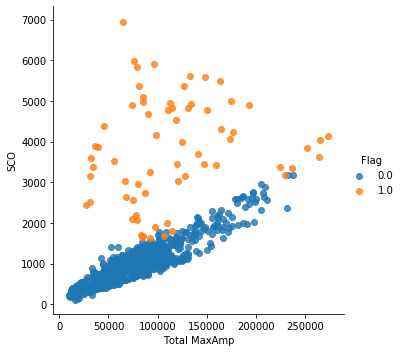

In [8]:
sn.lmplot('Total MaxAmp', 'SCO', data=predictedsignalDataFrame, hue="Flag", fit_reg=False)

In [9]:
# Loading wav files for spectrogramms
audiolist = sigp.load_list_of_wav(signalPath)
temp = audiolist
ppredictedsignalDataFrame = predictedsignalDataFrame.loc[predictedsignalDataFrame['Flag'] == 1]

In [10]:
ppredictedsignalDataFrame.head()

,Total MaxAmp,Split MaxAmp 1,Split MaxAmp 2,Split MaxAmp 3,Split MaxAmp 4,SCO,Crest Factor,Centroid,Spread,Flatness,...,MFCC_11,MFCC_12,MFCC_13,MFCC_14,MFCC_15,MFCC_16,MFCC_17,MFCC_18,MFCC_19,Flag
18,150491.537060,81973.574809,74724.705839,70135.186372,71275.026723,4768.996440,261.852373,3178.265733,4.567400e+06,0.003763,...,1.067613,0.516805,7.727972,6.373898,-3.611062,14.580167,-0.361103,1.332859,-1.833363,1.0
22,236507.182781,116176.032036,118108.395287,118720.397393,119606.307581,3357.341745,251.933310,2438.519403,4.593863e+06,0.002871,...,11.900064,-1.278367,4.716408,7.142910,-0.385759,11.292554,-4.274628,10.805632,-7.096260,1.0
72,84961.096049,42281.716894,49370.505156,48444.400386,35671.419806,5091.114845,314.768797,3347.761123,3.994063e+06,0.004791,...,-4.002845,-2.684654,15.342606,3.182205,-4.415860,17.644039,-1.578250,-1.539109,-0.270936,1.0
92,120590.941329,62138.888273,59239.083757,61738.239186,55555.813378,3039.291506,195.301846,3227.916592,4.569099e+06,0.004215,...,1.231169,1.877966,7.528243,4.533432,-4.910938,16.134905,-0.934048,2.585391,-2.098077,1.0
117,78626.663618,50864.322883,41416.574135,30362.460121,26754.204063,5846.552628,246.349500,3022.799199,3.208720e+06,0.004538,...,-4.967977,-4.188606,18.178350,1.985808,-4.512725,14.636807,4.350399,-5.397628,0.313344,1.0


No handles with labels found to put in legend.


Signal amount is  66
Signal № 18
Time resolution (s) 0.028444444444444446
Frequency resolution (Hz) 35.15625


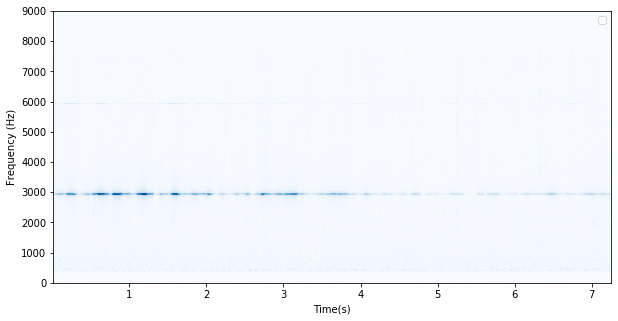

No handles with labels found to put in legend.


Signal № 22
Time resolution (s) 0.028444444444444446
Frequency resolution (Hz) 35.15625


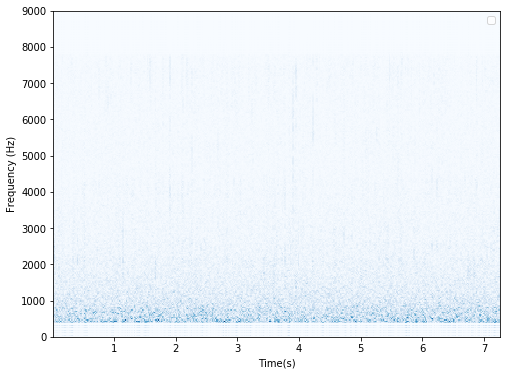

No handles with labels found to put in legend.


Signal № 72
Time resolution (s) 0.028444444444444446
Frequency resolution (Hz) 35.15625


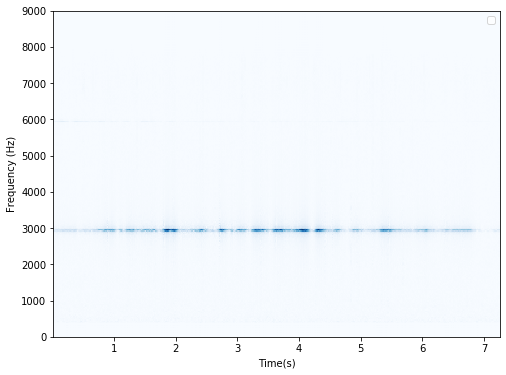

No handles with labels found to put in legend.


Signal № 92
Time resolution (s) 0.028444444444444446
Frequency resolution (Hz) 35.15625


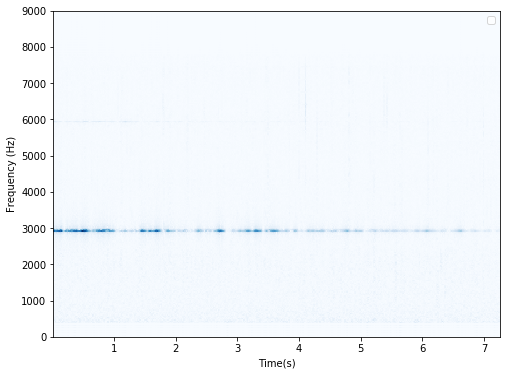

No handles with labels found to put in legend.


Signal № 117
Time resolution (s) 0.028444444444444446
Frequency resolution (Hz) 35.15625


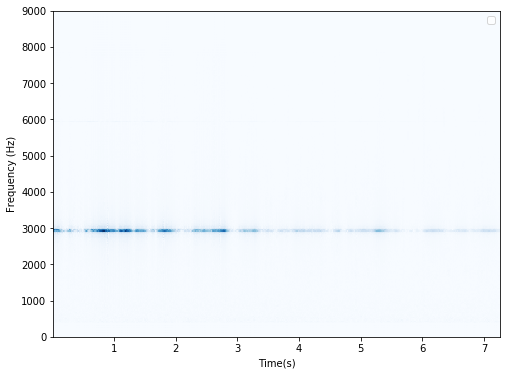

No handles with labels found to put in legend.


Signal № 140
Time resolution (s) 0.028444444444444446
Frequency resolution (Hz) 35.15625


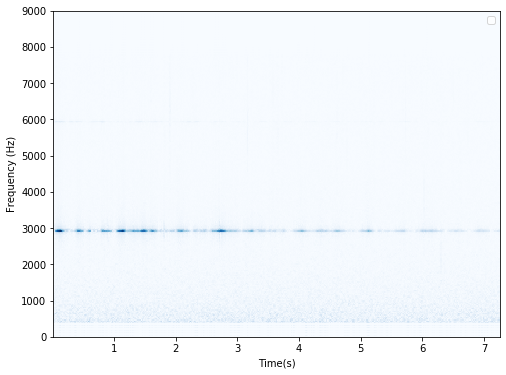

No handles with labels found to put in legend.


Signal № 174
Time resolution (s) 0.028444444444444446
Frequency resolution (Hz) 35.15625


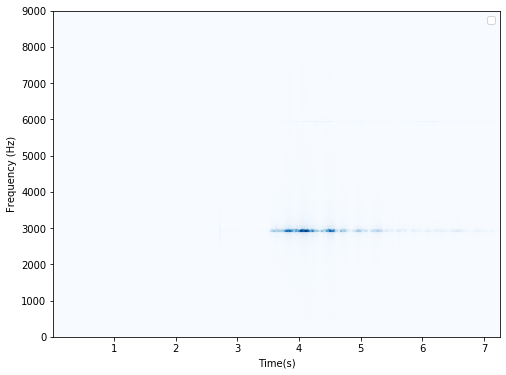

No handles with labels found to put in legend.


Signal № 177
Time resolution (s) 0.028444444444444446
Frequency resolution (Hz) 35.15625


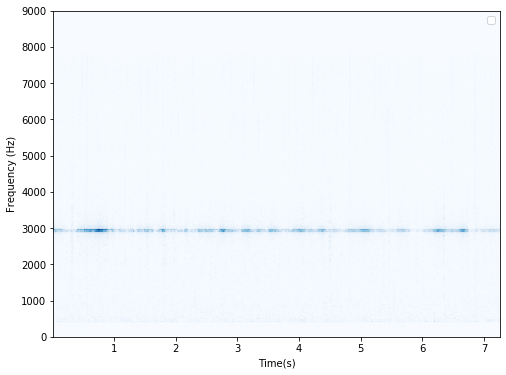

No handles with labels found to put in legend.


Signal № 207
Time resolution (s) 0.028444444444444446
Frequency resolution (Hz) 35.15625


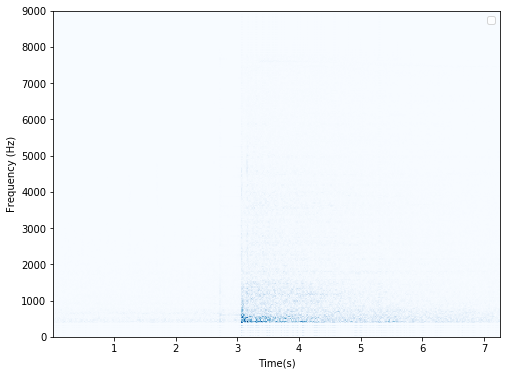

No handles with labels found to put in legend.


Signal № 219
Time resolution (s) 0.028444444444444446
Frequency resolution (Hz) 35.15625


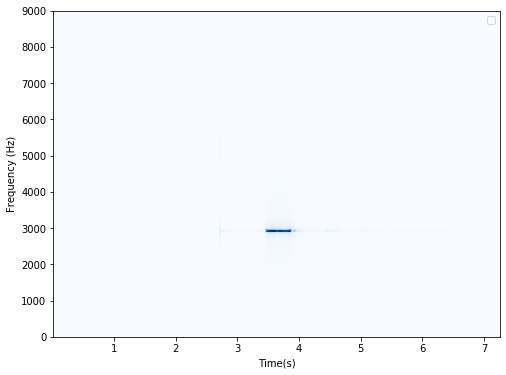

<Figure size 576x432 with 0 Axes>

In [12]:
sigp.plot_all_spectrogramms(audiolist, predictedsignalDataFrame, 512, 0, 10, 1) # last param is activator , 1 - start, 0 - none

In [16]:
audiolist[174].make_audio()

In [17]:
#sigp.copy_filtered_signal(signalPath, 850)

In [18]:
# Freeing the memory
del audiolist[:]
audiolist = None
del audiolist